In [2]:
import pandas as pd
# from google.colab import files
# files.upload()

In [17]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include = ['object']).columns:
  df[col] = encoder.fit_transform(df[col])

In [23]:
X = df.drop('price',axis = 1)
Y = df['price']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

In [37]:
import torch
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim

class ANN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(num_features, 6),
            nn.Linear(6,1)
        )
    def forward(self, x):
        return self.net(x)



In [44]:
shape = X.shape[1]
model = ANN(shape)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs = 100
result = []
for ep in range(num_epochs):
    # model training
    model.train()
    # forward pass
    y_preds = model(X_tensor)
    # loss calculation
    loss = criterion(y_preds, Y_tensor)
    # optimizer
    optimizer.zero_grad()
    # backward propagation
    loss.backward()
    # optimizer evaluation and weight update
    optimizer.step()
    model.eval()
    result.append(loss.item())
    # printing loss in each epoch
    print(f"Epoch {ep+1}/{num_epochs} | MSE: {loss.item():.6f}")

Epoch 1/100 | MSE: 1.731856
Epoch 2/100 | MSE: 0.992670
Epoch 3/100 | MSE: 0.729965
Epoch 4/100 | MSE: 0.569857
Epoch 5/100 | MSE: 0.468161
Epoch 6/100 | MSE: 0.409914
Epoch 7/100 | MSE: 0.379796
Epoch 8/100 | MSE: 0.364135
Epoch 9/100 | MSE: 0.354851
Epoch 10/100 | MSE: 0.348429
Epoch 11/100 | MSE: 0.343534
Epoch 12/100 | MSE: 0.339628
Epoch 13/100 | MSE: 0.336447
Epoch 14/100 | MSE: 0.333827
Epoch 15/100 | MSE: 0.331654
Epoch 16/100 | MSE: 0.329842
Epoch 17/100 | MSE: 0.328326
Epoch 18/100 | MSE: 0.327053
Epoch 19/100 | MSE: 0.325981
Epoch 20/100 | MSE: 0.325076
Epoch 21/100 | MSE: 0.324311
Epoch 22/100 | MSE: 0.323663
Epoch 23/100 | MSE: 0.323114
Epoch 24/100 | MSE: 0.322647
Epoch 25/100 | MSE: 0.322251
Epoch 26/100 | MSE: 0.321913
Epoch 27/100 | MSE: 0.321626
Epoch 28/100 | MSE: 0.321381
Epoch 29/100 | MSE: 0.321172
Epoch 30/100 | MSE: 0.320993
Epoch 31/100 | MSE: 0.320841
Epoch 32/100 | MSE: 0.320711
Epoch 33/100 | MSE: 0.320599
Epoch 34/100 | MSE: 0.320504
Epoch 35/100 | MSE: 0.3

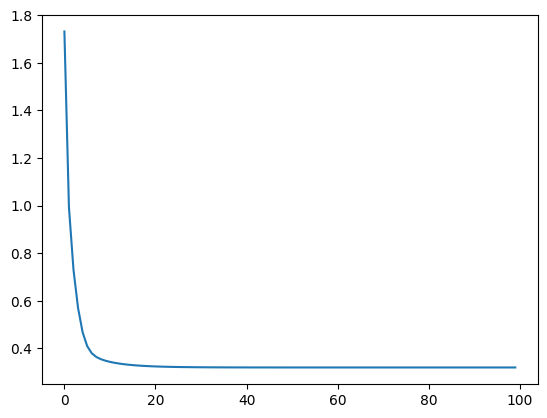

In [45]:
import matplotlib.pyplot as plt
plt.plot(result)